In [5]:
import pandas as pd
from __future__ import print_function
import random
import numpy as np #importamos para poder utilizar random.choice

In [2]:
humandata = pd.read_csv('juego_azar.csv',delimiter=';')

In [3]:
humandatalength,humancolumnslength = humandata.shape
humandata.head()

,DRAW_ID,N1,N2,N3,N4,N5
0,1,2,14,21,36,46
1,2,13,25,32,38,46
2,3,1,6,13,17,26
3,4,10,13,20,33,41
4,5,10,15,17,40,45


In [7]:
randomdata = []
for i in range(humandatalength):
    randomdata.append(np.random.choice(50, 5, replace=False)+1)
randomdata = np.array(randomdata)
randomdata = pd.DataFrame(randomdata,
                         index = [i+ humandatalength for i in range(humandatalength)],
                         columns = ['N1','N2','N3','N4','N5'])

In [13]:
#mostramos las combinaciones random
print(randomdata.head())

     N1  N2  N3  N4  N5
300  16  49  23  32   6
301  17  27  20  42  16
302  47   6  35  21  30
303  19  29  32   9  30
304  13  18  47   9  41


In [14]:
#mostramos las combinaciones humanas
print(humandata.head())

   DRAW_ID  N1  N2  N3  N4  N5
0        1   2  14  21  36  46
1        2  13  25  32  38  46
2        3   1   6  13  17  26
3        4  10  13  20  33  41
4        5  10  15  17  40  45


In [11]:
humangroup= humandata.groupby(['N1','N2','N3','N4','N5'])
groupsize = humangroup.size();
groupsize.sort_values(ascending=False)
print(groupsize)

N1  N2  N3  N4  N5
1   2   6   20  36    1
        11  27  29    1
        18  31  36    1
    3   16  24  37    1
    4   7   10  50    1
                     ..
28  30  42  45  49    1
29  33  39  41  44    1
31  32  38  40  42    1
    33  34  37  40    1
            39  45    1
Length: 300, dtype: int64


In [16]:
humandata['ishuman']=1
randomdata['ishuman']=0

(array([ 6.,  9., 17., 10.,  8.]),
 array([19. , 23.2, 27.4, 31.6, 35.8, 40. ]),
 <a list of 5 Patch objects>)

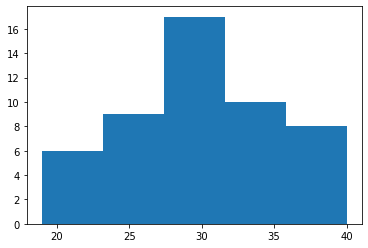

In [19]:
import matplotlib.pyplot as plt
freq = []

for val in range(50):
    count = ((humandata['N1']==val +1).sum()+
            (humandata['N2']==val +1).sum()+
            (humandata['N3']==val +1).sum()+
            (humandata['N4']==val +1).sum()+
            (humandata['N5']==val +1).sum())
    freq.append(count)

plt.hist(freq, bins=5)

In [50]:
frames =[humandata[['N1','N2','N3','N4','N5','ishuman']],randomdata[['N1','N2','N3','N4','N5','ishuman']]]
full_frame = pd.concat(frames)

X= full_frame[['N1','N2','N3','N4','N5','ishuman']]
#variable que almacena si es humano o aleatorio
y= full_frame[['ishuman']]

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [52]:
#se crean los set de entrenamiento y prueba, 30% de prueba
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [53]:
model = RandomForestClassifier(n_estimators= 100)
model.fit(X_train[['N1','N2','N3','N4','N5']], y_train.values.ravel())

RandomForestClassifier()

In [64]:
y_pred= model.predict(X_test[['N1','N2','N3','N4','N5']])
y_preddf = pd.DataFrame(y_pred)

y_preddf.head()

,0
0,1
1,1
2,1
3,1
4,0


In [65]:
from sklearn import metrics
print("Score:",metrics.f1_score(y_test, y_pred, average='macro'))

Score: 0.944437584887023
